In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [2]:
df = pd.read_csv("data/CigarettesSW.csv", index_col='id')
df

,state,year,cpi,population,packs,income,tax,price,taxs
id,,,,,,,,,
1,AL,1985,1.076,3973000.0,116.486282,46014968,32.500004,102.181671,33.348335
2,AR,1985,1.076,2327000.0,128.534592,26210736,37.000000,101.474998,37.000000
3,AZ,1985,1.076,3184000.0,104.522614,43956936,31.000000,108.578751,36.170418
4,CA,1985,1.076,26444000.0,100.363037,447102816,26.000000,107.837341,32.104000
5,CO,1985,1.076,3209000.0,112.963539,49466672,31.000000,94.266663,31.000000
...,...,...,...,...,...,...,...,...,...
92,VT,1995,1.524,582827.0,122.334755,12448607,44.000000,175.638748,52.363750
93,WA,1995,1.524,5431024.0,65.530922,129680832,80.500000,239.109344,96.142670
94,WI,1995,1.524,5137004.0,92.466347,115959680,62.000000,201.381256,71.589584


In [172]:
X0 = df.values[:,2:]
X0 = X0.astype('d')
X0 = scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(96, 7)


/usr/lib/python3/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [173]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

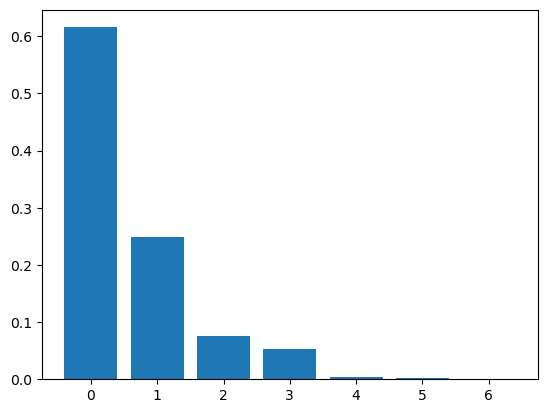

In [174]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

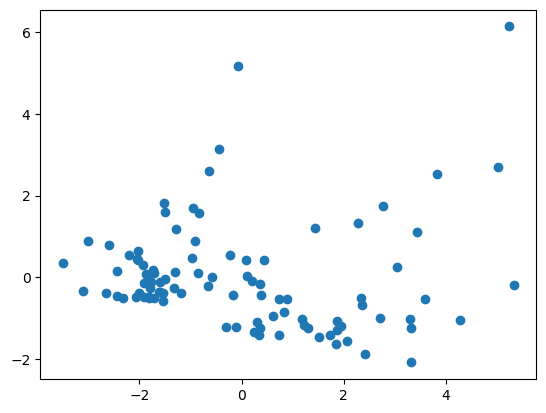

In [175]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [308]:
alpha = 0.55
print(alpha)

0.55


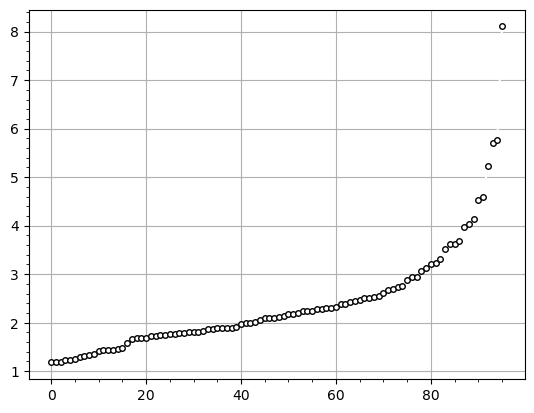

[ 5.55111512e-17  1.85037171e-17 -2.77555756e-17 -7.40148683e-17
  3.70074342e-17 -6.93889390e-18  1.38777878e-17]


In [309]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

[ 0.10416664 -0.46247793  0.26851062 -0.4708606  -0.526698   -0.21464333
 -0.63378203]


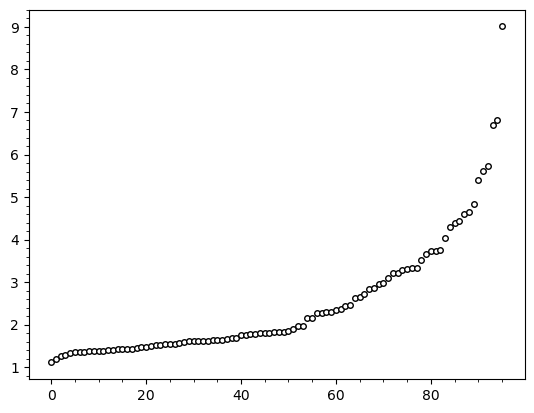

In [310]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

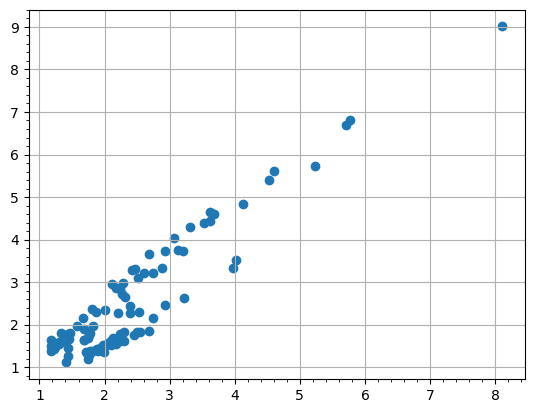

In [311]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [312]:
X1_0 = X0 - c0
X1 = X0 - c

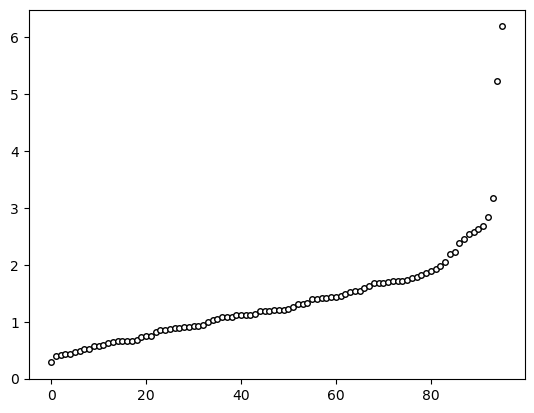

4.308726606172729 [ 0.39181071  0.17149299 -0.36379699  0.2554142   0.44721764  0.4613229
  0.45460689]


In [313]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

2.888877247896114 [ 0.52552617  0.08547543 -0.17060972  0.12444174  0.41753722  0.54142991
  0.45214942]


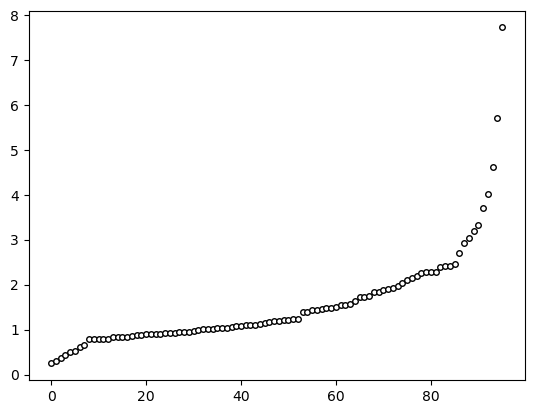

In [314]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

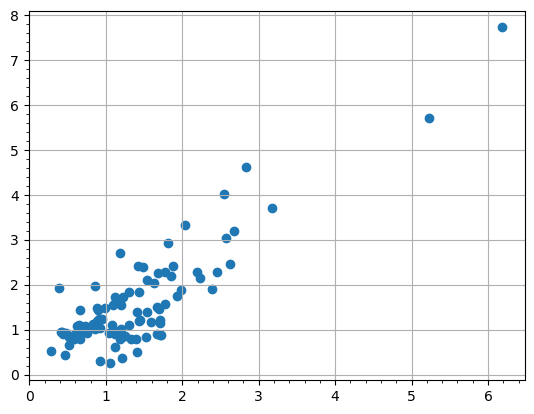

In [315]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [316]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

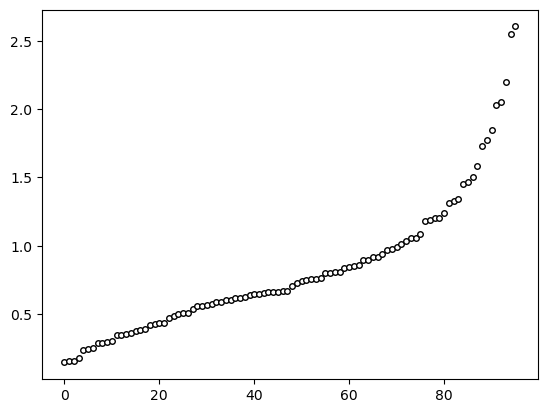

1.7439162425530146 [-0.21248412  0.70242508  0.0254359   0.63376084 -0.13220917 -0.16535183
 -0.1197047 ]


In [317]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

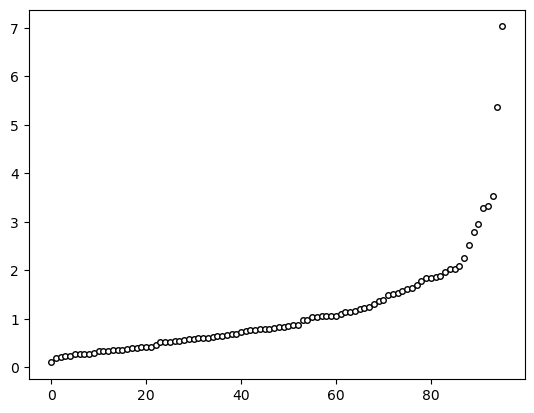

0.7280244421438578 [ 0.67528841 -0.14489862  0.4251264  -0.15347917 -0.37333434  0.15399152
 -0.39447399]


In [318]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

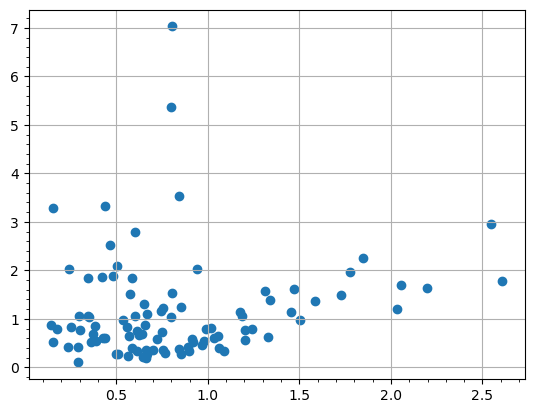

In [319]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [320]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

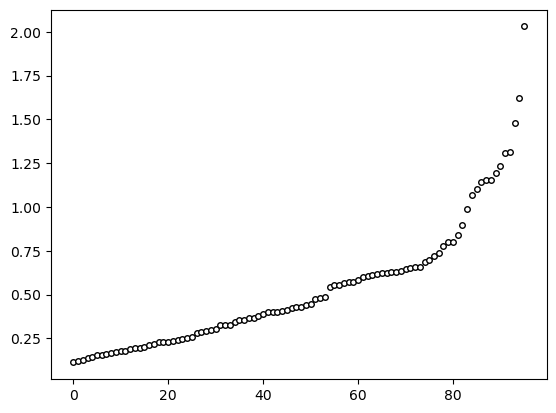

0.5243468905218299 [ 0.49018655  0.06234036  0.83576508  0.10643864 -0.03015123  0.21123377
 -0.02166971]


In [321]:
a3_0, L3_0 = pca.find_pc(X3_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

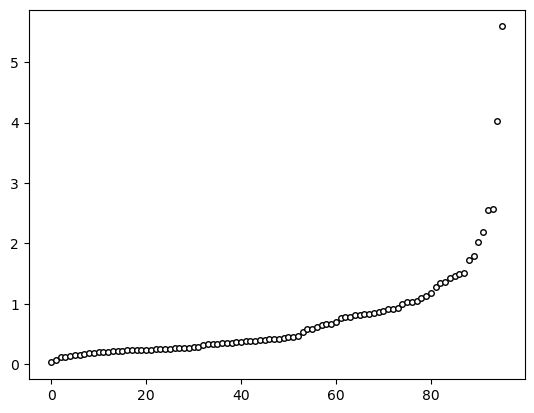

0.5443405892467588 [-0.13525662  0.55462122  0.68485228  0.43850731  0.07071309  0.03748553
  0.07990083]


In [322]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a3, L3 = pca.find_robust_pc(X3, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

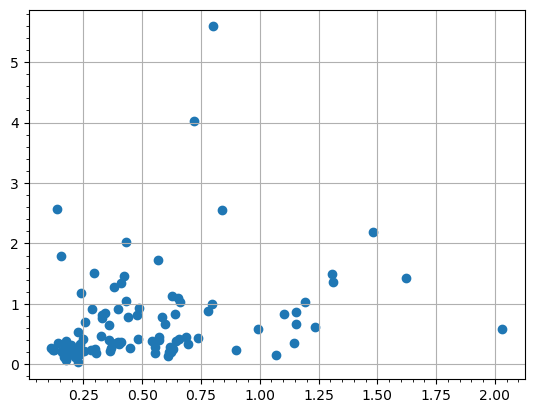

In [323]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [324]:
from sklearn.decomposition import PCA

In [325]:
def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


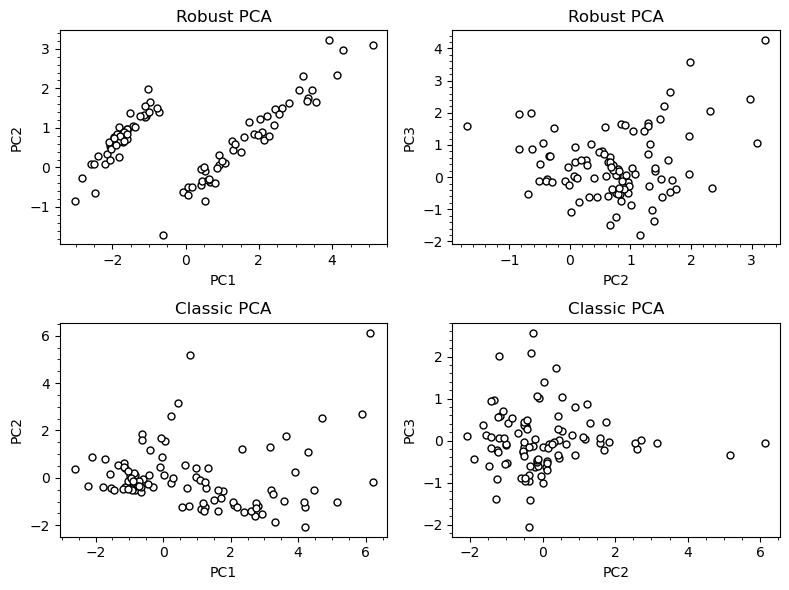

In [326]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,2)
plt.title('Robust PCA')
plt.scatter(U2, U3, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,3)
plt.title('Classic PCA')
plt.scatter(U1_0, U2_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,4)
plt.title('Classic PCA')
plt.scatter(U2_0, U3_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_cigarette.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


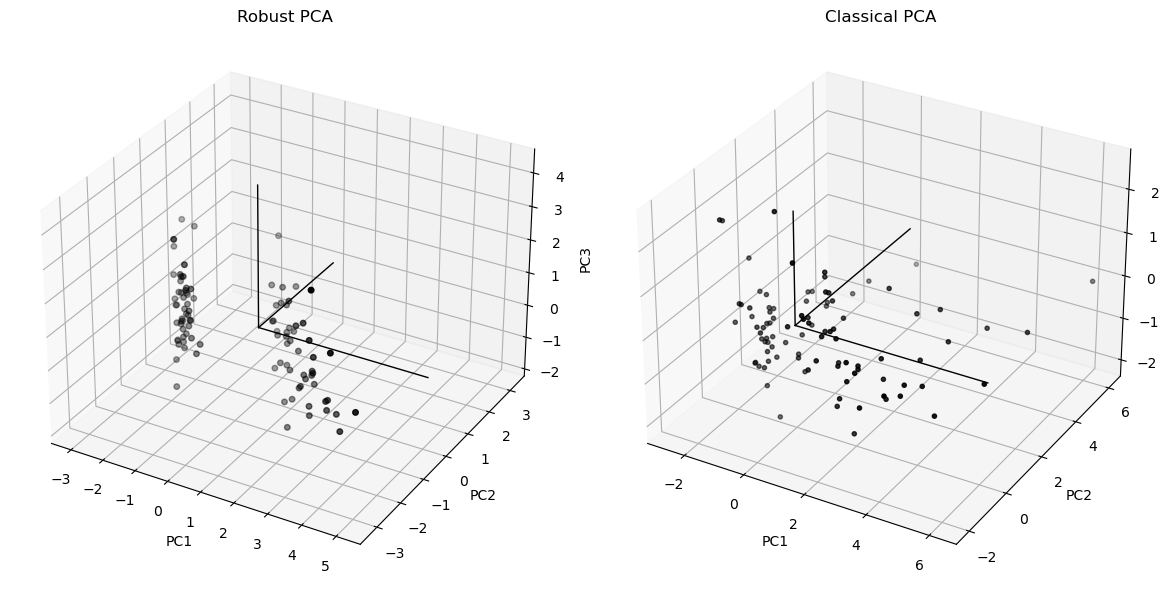

In [327]:
fig, axes = plt.subplots(1, 2, 
                         subplot_kw={"projection": "3d"}, )
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.scatter(U1, -U2, U3, s=16, c='k')

ax1.plot([0, U1.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, U2.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3', rotation='vertical')

# ax1.set_xlim(U1.min(), U1.max())
# ax1.set_ylim(U2.min(), U2.max())
# ax1.set_zlim(U3.min(), U3.max())

ax1.set_title('Robust PCA')

ax2.scatter(U1_0, U2_0, U3_0, s=9, c='k')

ax2.plot([0, U1_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, U2_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

# ax2.set_xlim(U1_0.min(), U1_0.max())
# ax2.set_ylim(U2_0.min(), U2_0.max())
# ax2.set_zlim(U3_0.min(), U3_0.max())

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_cigarette_1.eps')

plt.show()

In [328]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [329]:
# N = len(X1)
# alpha = (N - 25) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.55


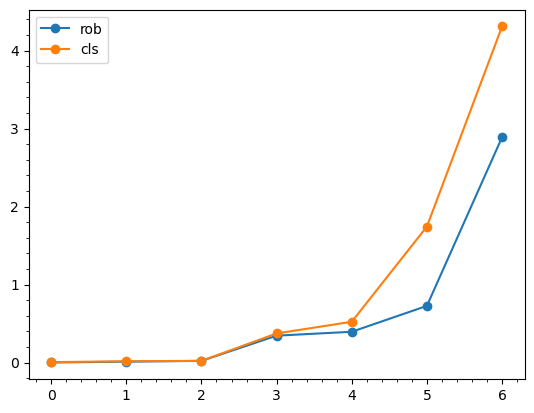

In [330]:
plt.plot(sorted(Ls), marker='o', label='rob')
plt.plot(sorted(Ls_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [331]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

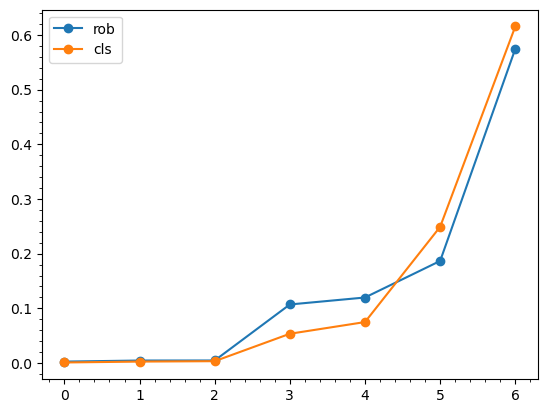

In [332]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [333]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [334]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[  3.82553915   1.90910915  -0.07247812  -2.75346883   2.23826666
   -6.17999709   0.70454015]
 [  1.90910915  11.77787829  -0.9765707  -13.66273032   1.49745248
   -1.6032135   -0.66947236]
 [ -0.07247812  -0.9765707    0.55879346   1.18385489  -0.19798401
    0.11783244   0.39297014]
 [ -2.75346883 -13.66273032   1.18385489  16.82147422  -1.64264677
    2.72811832   0.24181868]
 [  2.23826666   1.49745248  -0.19798401  -1.64264677   2.7079078
   -3.45193596  -1.10939005]
 [ -6.17999709  -1.6032135    0.11783244   2.72811832  -3.45193596
   10.52378473  -1.59080033]
 [  0.70454015  -0.66947236   0.39297014   0.24181868  -1.10939005
   -1.59080033   2.30878208]] 0.8565688614966515
[[  4.32283394   3.26304014  -0.54412144  -3.96808629   0.58841568
   -6.37636599   1.72831976]
 [  3.26304014  17.0242455   -0.69697074 -21.72818917   4.93996103
   -3.82009258  -2.52380436]
 [ -0.54412144  -0.69697074   0.39471802   0.96179854  -0.39244573
    0.94328341   0.12860367]
 [ -3.96808629 -21.72

In [335]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[6.10398674e-01 3.01489052e-01 7.17396852e-02 9.70202992e-03
 2.97638987e-04 3.68154480e-03 2.69137587e-03]
